# Topic 1: Regression

Predicting a continuous variable.

## Predicting House Price - Part 1: Exploratory Analysis

The dataset house sale prices for King County, Seattle. It includes homes sold between May 2014 and May 2015. The dataset provides features the houses have and the price at which they were sold. It can be used to model house price prediction.

The dataset is available at kaggle https://www.kaggle.com/harlfoxem/housesalesprediction

Some of the attributes that are captured in the dataset are

1. No of bedrooms and bathrooms
2. Total square feet of living 
3. How many floors
4. Wether it has a basement and size of the basement
5. Grade of the house 
6. Weather it has waterfront and the quality of the view
7. When the house was built and if the house is renovated, if it is renovated?
8. Latitude and longitude
9. price of the house
10. When the house was sold

#### Let's explore the dataset to understand these attributes and their characteristics in more detail

# Loading the dataset

In [205]:
import warnings
warnings.filterwarnings('ignore')

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
%matplotlib inline

### Checking the version

In [207]:
pd.__version__

'1.0.5'

### TODO

Check all the library versions

In [208]:
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [209]:
house_df = pd.read_csv('../data/kc_house_data.csv')

In [210]:
house_df.head( 5 )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [211]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Exploratory Analysis

It is important to understand the properties of each variable including the target variable before actually creating a model to predict.

### Any missing values

In [212]:
#missing data
total = house_df.isnull().sum().sort_values(ascending=False)
total

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

### Visual representation of missing data

Install missingno

pip install missingno

In [213]:
import missingno

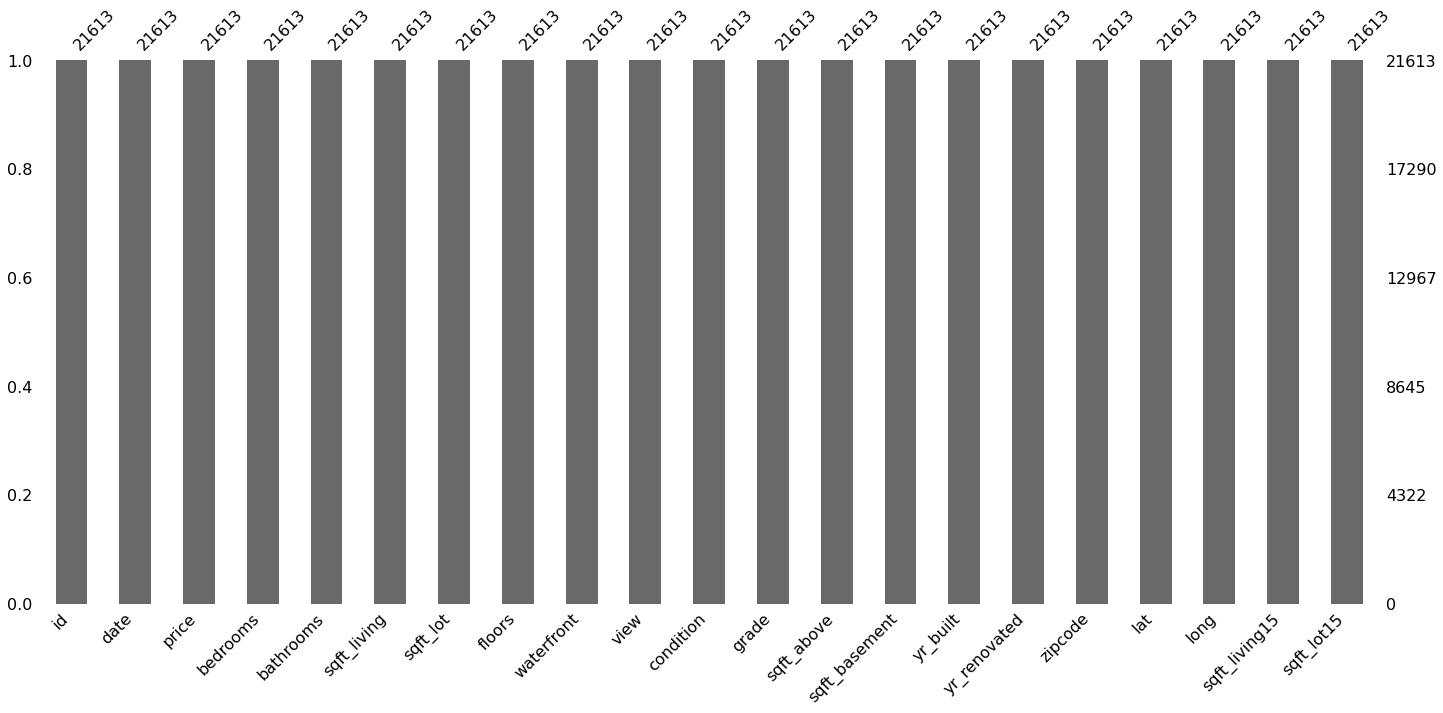

In [214]:
missingno.bar( house_df )

### Understanding distribution of price - target variable

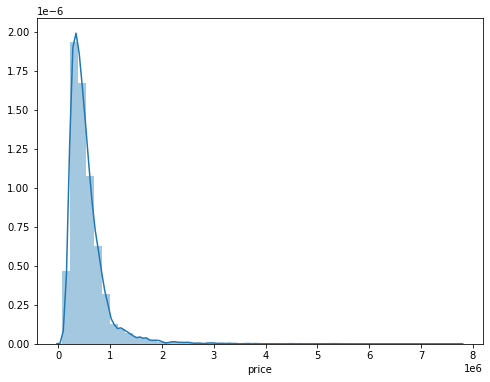

In [215]:
plt.figure(figsize=(8,6))
sn.distplot( house_df.price );

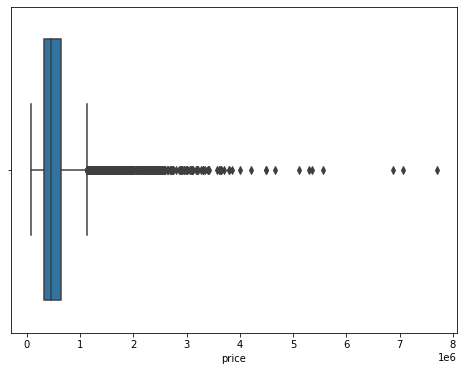

In [216]:
plt.figure(figsize=(8,6))
sn.boxplot( house_df.price );

#### Price is a highly skewed variable. Right skewed.

* Such variables can be tranformed using log tranformation, which might make the variable more normally distributed. 

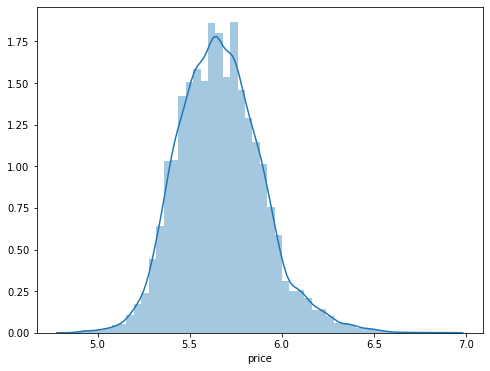

In [217]:
plt.figure(figsize=(8,6))
sn.distplot( np.log10( house_df.price ) );

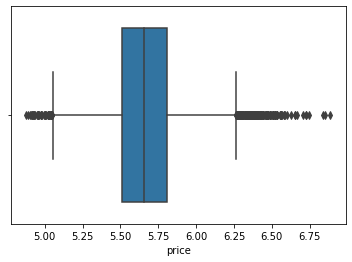

In [218]:
sn.boxplot( np.log10( house_df.price ) );

In [219]:
house_df['log_price'] = np.log10( house_df.price );

### How sqft_living is distributed?

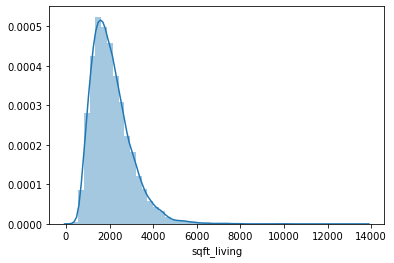

In [220]:
sn.distplot( house_df.sqft_living );

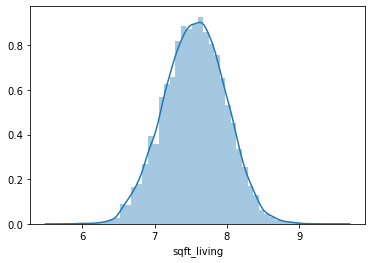

In [221]:
sn.distplot( np.log1p( house_df.sqft_living ) );

### How different variables are impacting sales?

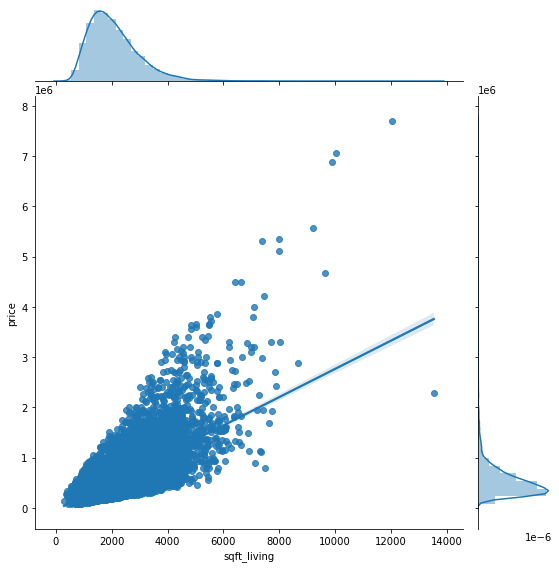

In [222]:
sn.jointplot(x="sqft_living", y="price", data=house_df, kind = 'reg', size = 8)

#### As expected, sqft_living is highly correlated with price. This should be a good predictor.

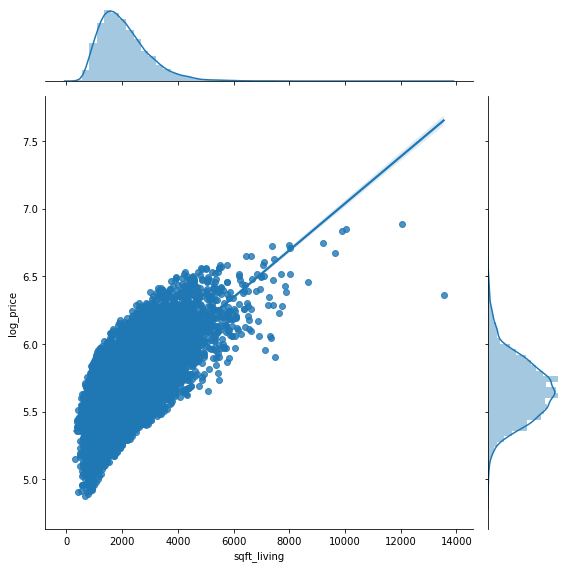

In [223]:
sn.jointplot(x="sqft_living", y="log_price", data=house_df, kind = 'reg', size = 8)

### Check correlation of all numerical variables with price

In [224]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [225]:
numerical_vars = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']

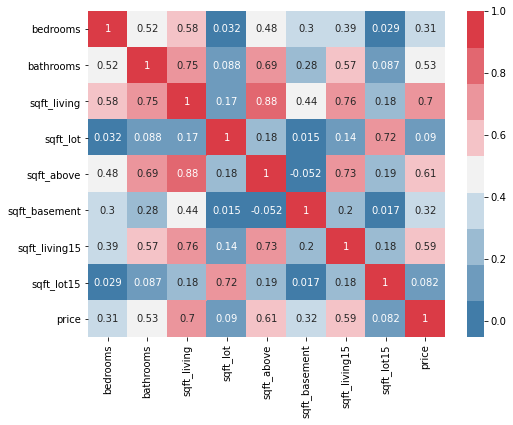

In [226]:
plt.figure(figsize=(8,6))
sn.heatmap(house_df[numerical_vars].corr(), 
           annot=True,
           cmap = sn.diverging_palette(240,10, n = 9));

- sqft_lot and sqft_lot15 are highly correlated. We can drop one of the variables. We can drop sqft_lot15 (This information may not be available).
- Price is highly correlated with sqft_living and sqft_above (as expected). 
- And moderately correlated with number of bathrooms, bedrooms and sqft_basement.
- sqft_living is highly correlated with sqft_above. We can choose one of the two variables as predictor. Because, sqft_living is highly correalted with price, we will choose the variable.

In [227]:
final_num_features = numerical_vars

In [228]:
final_num_features.remove('sqft_lot15')
final_num_features.remove('sqft_above')
final_num_features.remove('price')

### How is price impacted by categorical variables?

**Does having a waterfront influence the price of the house?**

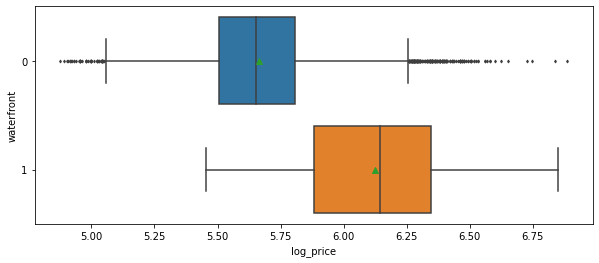

In [229]:
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sn.boxplot(y = 'waterfront', 
            x = 'log_price', 
            data = house_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 2, 
            ax = ax)
plt.show()

In [230]:
final_cat_features = ['waterfront']

## How ordinal Variables influencing the prices?

View, grade and conditions seems to be on a rating scales.

### Correlation between having a view and price

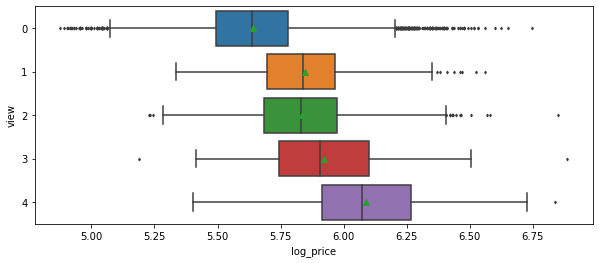

In [231]:
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sn.boxplot(y = 'view', 
            x = 'log_price', 
            data = house_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 2, 
            ax = ax)
plt.show()

In [232]:
final_cat_features = final_cat_features + ['view']

### Corrleation between condition of the house and price?

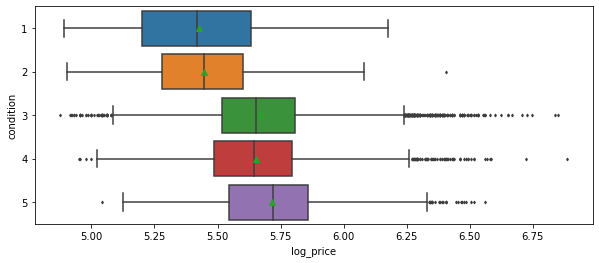

In [233]:
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sn.boxplot(y = 'condition', 
            x = 'log_price', 
            data = house_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 2, 
            ax = ax)
plt.show()

In [234]:
final_cat_features = final_cat_features + ['condition']

### Correlation between grade and price

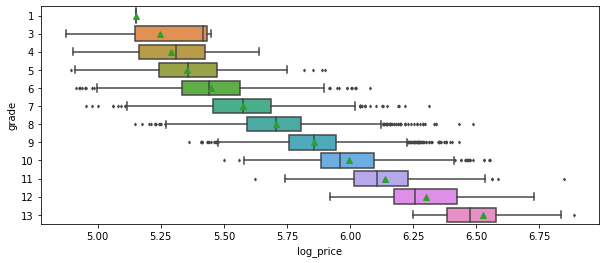

In [235]:
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sn.boxplot(y = 'grade', 
            x = 'log_price', 
            data = house_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 2, 
            ax = ax)
plt.show()

#### The grade of the house is highly correlated with the price.

In [236]:
final_cat_features = final_cat_features + ['grade']

### Corrrelation between floors and price

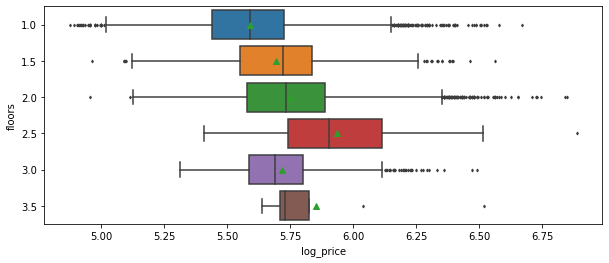

In [237]:
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sn.boxplot(y = 'floors', 
            x = 'log_price', 
            data = house_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 2, 
            ax = ax)
plt.show()

In [238]:
final_cat_features = final_cat_features + ['floors']

#### An interesting observation that median price reduces when the number of floors goes from 2 to 3 or 3.5. In fact, the mean price for the houses with 3.5 floors is outside the distribution, as it is greately influenced by the outliers.

### Bedrooms and bathrooms vs. Price

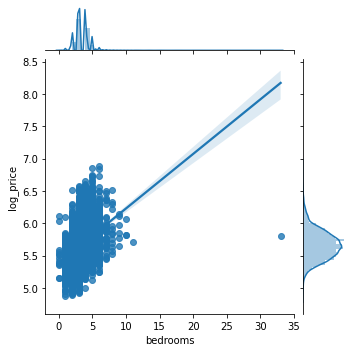

In [239]:
sn.jointplot(x="bedrooms", 
              y="log_price", 
              data=house_df, 
              kind = 'reg', 
              size = 5)

#### Note:

There is a house with 30 bedrooms. This seems to be an outliers. We can remove it from the dataset.

In [240]:
house_df = house_df[house_df.bedrooms < 30]

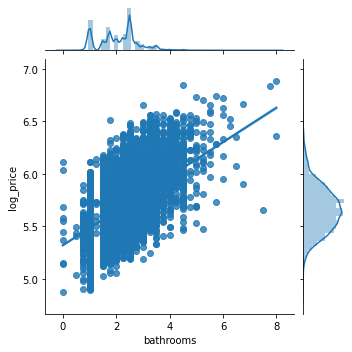

In [241]:
sn.jointplot(x="bathrooms", 
              y="log_price", 
              data=house_df, 
              kind = 'reg', 
              size = 5)

In [242]:
house_df = house_df[(house_df.bedrooms > 0) &
                    (house_df.bathrooms > 0) ]

In [243]:
final_num_features  = final_num_features + ['bedrooms', 'bathrooms']

## Building Models

In [244]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,5.346157
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5.730782
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,5.255273
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,5.781037
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5.707570


In [245]:
X_features = house_df.columns

### Splitting the dataset

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_features = final_num_features + final_cat_features

In [248]:
X_train, X_test, y_train, y_test = train_test_split(house_df[X_features],
                                                    house_df.log_price,
                                                    train_size = 0.8,
                                                    random_state = 42)

### Building a Linear Model

In [249]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [250]:
lreg = LinearRegression()

In [251]:
lreg.fit(X_train, y_train)

LinearRegression()

In [252]:
dict(zip(X_train.columns, lreg.coef_))

{'bedrooms': -0.003787740193770458,
 'bathrooms': -0.0028812808849727266,
 'sqft_living': 5.6585859592850155e-05,
 'sqft_lot': -5.779571676084477e-08,
 'sqft_basement': 5.843253271001743e-05,
 'sqft_living15': 4.139109800810108e-05,
 'waterfront': 0.163115026171834,
 'view': 0.026027188282610185,
 'condition': 0.04192665440831281,
 'grade': 0.07842313404906663,
 'floors': 0.034524416518376067}

In [253]:
from sklearn.metrics import r2_score

In [254]:
y_pred = lreg.predict(X_test)

In [255]:
r2_score( y_test, y_pred)

0.5908070914379457

### Encoding Categorical Features

In [256]:
final_cat_features = final_cat_features + ['zipcode']

In [257]:
house_clean_df = house_df[final_num_features + final_cat_features ]

In [258]:
house_encoded_df = pd.get_dummies(house_clean_df,
                                  columns = final_cat_features,
                                  drop_first = True)

In [259]:
X_features = house_encoded_df.columns

In [260]:
X_train, X_test, y_train, y_test = train_test_split(house_encoded_df[X_features],
                                                    house_df.log_price,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [261]:
X_features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement',
       'sqft_living15', 'bedrooms', 'bathrooms', 'waterfront_1', 'view_1',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=101)

### TODO: Rebuild the model with encoded ZIP codes added

## Creating New Variables

Sometimes that variables present in the dataset can be used as it is. And we may need to derive variables from the datasets. For example, the year in which the house is built. It is not a continuous variable and if we use it as a categorical variable, it will create several categories. And there might not have much information about the categories. But what we can do it, we can calcuate the **age** of the house, when it is sold by calculating the difference between the year it is sold and the year it is built.

### bathrooms per bedroom

In [262]:
house_df['bedroom_bathroom'] = house_df.bathrooms / house_df.bedrooms

In [263]:
house_df['bedroom_bathroom'].max()

2.5

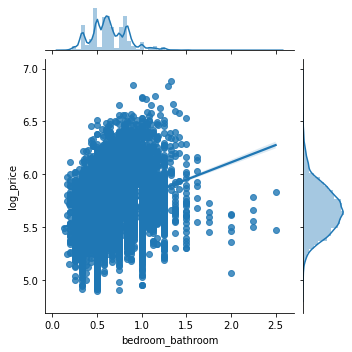

In [264]:
sn.jointplot(x="bedroom_bathroom", 
              y="log_price", 
              data=house_df, 
              kind = 'reg', 
              size = 5)

In [265]:
house_df['bedroom_bathroom'].describe()

count    21596.000000
mean         0.640997
std          0.211618
min          0.125000
25%          0.500000
50%          0.625000
75%          0.750000
max          2.500000
Name: bedroom_bathroom, dtype: float64

In [266]:
final_num_features  = final_num_features + ['bedroom_bathroom']

### Age of the house

In [267]:
house_df['age'] = house_df.apply( lambda rec: int( rec.date[0:4] ) - rec.yr_built, axis = 1 )

In [268]:
house_df[['yr_built', 'date', 'age']][0:5]

,yr_built,date,age
0,1955,20141013T000000,59
1,1951,20141209T000000,63
2,1933,20150225T000000,82
3,1965,20141209T000000,49
4,1987,20150218T000000,28


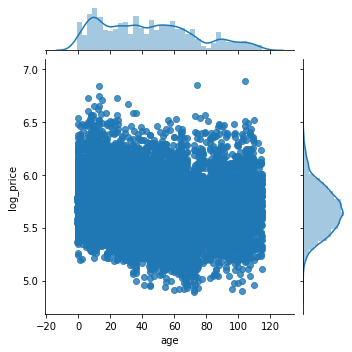

In [269]:
sn.jointplot(x="age", y="log_price", data=house_df, kind = 'reg', size = 5)

Price is declining with the age of the house, but not highly correlated.**

In [270]:
final_num_features  = final_num_features + ['age']

### Is the house renovated influences the price?

In [271]:
house_df['is_renovated'] = house_df['yr_renovated'].map( lambda rec: int( rec != 0) )

In [272]:
house_df['is_renovated'][0:5]

0    0
1    1
2    0
3    0
4    0
Name: is_renovated, dtype: int64

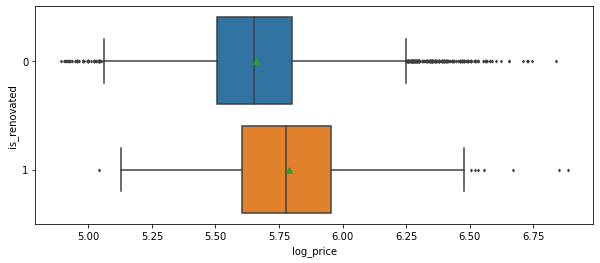

In [273]:
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sn.boxplot(y = 'is_renovated', 
            x = 'log_price', 
            data = house_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 2, 
            ax = ax)
plt.show()

In [274]:
final_cat_features = final_cat_features + ['is_renovated']

### TODO: Rebuild the model with new features added

## Applying Regularization

In [275]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

## Ridge Regression (L2)

In [276]:
ridge_m_ = Ridge()
ridge_params_ = {'alpha':[0.01, 0.1, 1, 5]}

grid_ridge_m = GridSearchCV(ridge_m_,
                            ridge_params_, 
                            scoring = "r2" , 
                            cv=5)

In [277]:
grid_ridge_m.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 5]},
             scoring='r2')

In [278]:
grid_ridge_m.best_score_

0.8775956732256287

In [279]:
grid_ridge_m.best_params_

{'alpha': 0.01}

## Lasso Regression

**Lasso Regression can be used for Feature Selection also**

In [284]:
lasso_m_ = Lasso( alpha = 0.00001, max_iter = 1000, normalize=True)
lasso_m_.fit( X_train, y_train )

Lasso(alpha=1e-05, normalize=True)

In [285]:
X_train.columns[lasso_m_.coef_ == 0]

Index(['bedrooms', 'bedrooms', 'bedrooms', 'bedrooms', 'condition_4',
       'grade_8', 'floors_2.0', 'floors_2.5', 'floors_3.5', 'zipcode_98045',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98108'],
      dtype='object')

In [286]:
selected_features = X_train.columns[lasso_m_.coef_ != 0]

In [287]:
selected_features

Index(['bathrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement',
       'sqft_living15', 'bathrooms', 'bathrooms', 'waterfront_1', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'floors_1.5',
       'floors_3.0', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_9807

In [288]:
len(selected_features)

92

In [289]:
r2_score(y_test, lasso_m_.predict(X_test))

0.8605856416711231

In [290]:
lreg_cv = cross_val_score(lreg,
                          X_train[selected_features],
                          y_train,
                          cv = 5,
                          scoring = 'r2')

In [291]:
lreg_cv

array([0.87115524, 0.87008659, 0.87189967, 0.86800663, 0.86925753])

### TODO: Building a model with selected features

## Decision Tree Regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor

### Build a decision tree for default value of max depth

In [140]:
tree_reg = DecisionTreeRegressor(max_depth = 4)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [141]:
y_tree_pred = tree_reg.predict(X_test)

In [142]:
r2_score(y_test, y_tree_pred)

0.5167300834079513

# Ensemble Methods

### Random Forest Regressor


A good read on how RF algorithm works.

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [168]:
from sklearn.ensemble import RandomForestRegressor

In [311]:
rf_params_ = {'max_depth' : [4, 7],
              'n_estimators': [50, 100],
              'max_features': [0.2, 0.4]}

In [312]:
rf_m_ = RandomForestRegressor()
rf_grid = GridSearchCV( rf_m_,
                         rf_params_, 
                         scoring = "r2" , 
                         cv=5)

In [313]:
rf_grid.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 7], 'max_features': [0.2, 0.4],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [314]:
rf_grid.best_score_

0.6591771127438353

In [315]:
rf_grid.best_params_

{'max_depth': 7, 'max_features': 0.4, 'n_estimators': 100}

In [316]:
feature_rank = pd.DataFrame( { 'feature': X_train.columns,
                               'importance': rf_grid.best_estimator_.feature_importances_ } )

In [317]:
feature_rank = feature_rank.sort_values('importance', 
                                        ascending = False)

In [318]:
feature_rank['cumsum'] = feature_rank.importance.cumsum()

In [334]:
len(feature_rank[feature_rank['cumsum'] < 0.98])

29

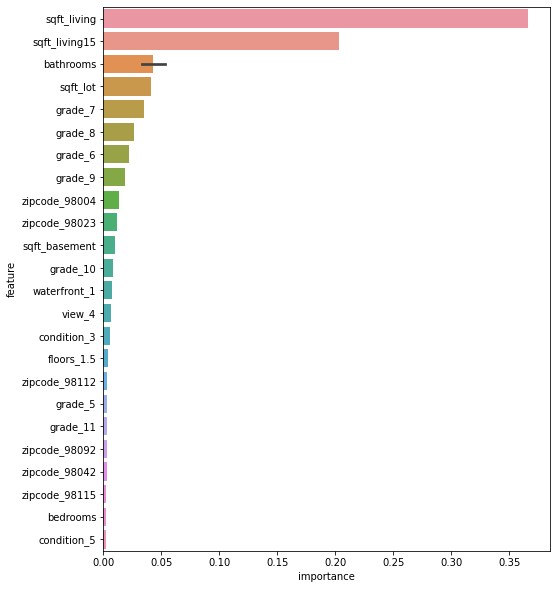

In [335]:
plt.figure(figsize=(8,10))
sn.barplot( y = 'feature', x = 'importance', data = feature_rank[0:29] );

In [336]:
selected_features_v2 = feature_rank[0:29]['feature']

In [337]:
selected_features_v2

4       sqft_living
7     sqft_living15
10        bathrooms
3         bathrooms
5          sqft_lot
11        bathrooms
24          grade_7
2         bathrooms
25          grade_8
23          grade_6
26          grade_9
38    zipcode_98004
48    zipcode_98023
6     sqft_basement
27         grade_10
12     waterfront_1
16           view_4
18      condition_3
31       floors_1.5
83    zipcode_98112
22          grade_5
28         grade_11
75    zipcode_98092
61    zipcode_98042
84    zipcode_98115
9          bedrooms
0          bedrooms
20      condition_5
1          bedrooms
Name: feature, dtype: object

### Using only the selected features from random forest 

In [338]:
rf_v1 = RandomForestRegressor( max_depth = 10, 
                               max_features = 0.7, 
                               n_estimators = 50 )

In [339]:
rf_v1.fit(X_train[selected_features_v2], y_train)

RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=50)

In [340]:
y_rf_pred = rf_v1.predict(X_test[selected_features_v2])

In [341]:
r2_score(y_test, y_rf_pred)

0.6871337234414985

### Adaboost Regressor

In [292]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [306]:
lreg = LinearRegression()

adaboost_m_ = AdaBoostRegressor(lreg, 
                                n_estimators = 10,
                                learning_rate = 0.9)

In [307]:
adaboost_m_.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.9,
                  n_estimators=10)

### Predicting on Test Set

In [308]:
y_pred = adaboost_m_.predict(X_test)

In [309]:
r2_score(y_pred, y_test)

0.852023832172351

In [310]:
np.sqrt(metrics.mean_squared_error(np.power(10, y_test), np.power(10, y_pred)))

140302.42731679228